# Changes in The Passenger/Seat Ratio For US Flight Trips in 2020
## by Yasir Alabas

## Investigation Overview

Our aim in this investigation is to find the factors that influence the number of passengers in a plane, specifically the passneger/seat ratio. This would be achived by studying the other factors such as flight class, distance, mail transformed and flight carrier company.



## Dataset Overview

The data consisted of 114135 flights that have been taken during the 4 first months of year 2020 in the US(right before flight lockdown went active in most countries because of the COVID-19 pandemic). The data consists of flight ids, flight destanation and origin, payload, mail, as well as passenger related information like number of passengers transformed and the number of seats that each flight harber. The data also includes the name of the carrier's company and the service class in each flight. There are some additional information about the aircrafts but we will not use those because they are irrelevant to our data exploration objectives.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('flights.csv')

In [4]:
flights['CLASS']=flights.CLASS.astype('category')
flights['Passenger_Seat_Ratio'] = flights.PASSENGERS.div(flights.SEATS)
flights = flights.query('Passenger_Seat_Ratio <= 1')

flights['MONTH']=flights['MONTH'].replace(1, 'January')
flights['MONTH']=flights['MONTH'].replace(2, 'February')
flights['MONTH']=flights['MONTH'].replace(3, 'March')
flights['MONTH']=flights['MONTH'].replace(4, 'April')

flights['CLASS']=flights['CLASS'].replace('F', 'Full First')
flights['CLASS']=flights['CLASS'].replace('G', 'Economy')
flights['CLASS']=flights['CLASS'].replace('L', 'Business')
flights['CLASS']=flights['CLASS'].replace('P', 'Discounted First')

top_carriers = flights.UNIQUE_CARRIER_NAME.apply(lambda x: 'Southwest Airlines Co.' if x in
    'Southwest Airlines Co.' else 'Delta Air Lines Inc.' if x in
    'Delta Air Lines Inc.' else 'SkyWest Airlines Inc.' if x in
    'SkyWest Airlines Inc.' else 'United Air Lines Inc.' if x in
    'United Air Lines Inc.'  else 'American Airlines Inc.' if x in
    'American Airlines Inc.' else np.nan)

top_origin = flights.ORIGIN_CITY_NAME.apply(lambda x: 'Chicago, IL' if x in
    'Chicago, IL' else 'Denver, CO' if x in
    'Denver, CO' else 'Atlanta, GA' if x in
    'Atlanta, GA'  else 'Houston, TX' if x in
    'Houston, TX' else 'Washington, DC' if x in
    'Washington, DC' else np.nan)

## Distribution of Passenger/Seat Ratio

The vast majority of flights taken were either empty or contain a very low number of passengers, coming after that is percentage of either almost full flights, or 80%-85% full.

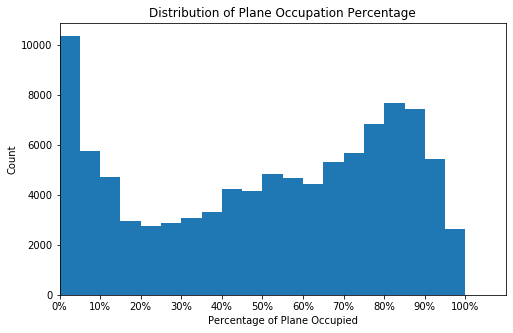

In [6]:
binsize = 0.05
bins = np.arange(0, flights['Passenger_Seat_Ratio'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'Passenger_Seat_Ratio', bins = bins);
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
           ['0%', '10%', '20%','30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Distribution of Plane Occupation Percentage')
plt.ylabel('Count')
plt.xlabel('Percentage of Plane Occupied')
plt.xlim((0,1.1));

## Number of Flights Taken in Q1 of 2020

The number of flight trips during the first 4 months of 2020 drastically fell from around 29000 flights in January to almost half of that number in April this is mostly due to flight restrictions that accord at the time from March to April because of the COVID-19 virus. As we can conclude from that sharp decline which happened between March and April.

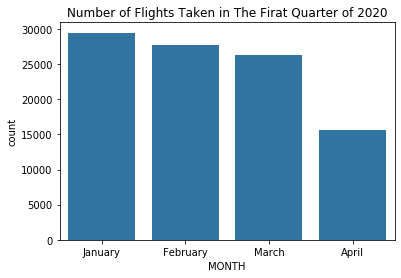

In [9]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
plt.title('Number of Flights Taken in The Firat Quarter of 2020')
sb.countplot(data = flights, x = 'MONTH', color = base_color, ax = ax);

## Top Traveled on US Airlines in Q1 of 2020

The top US airlines that people tend to travel on are by order Southwest Airlines, Delta Airlines, SkyWest Airlines, United Airlines and American Airlines. This by all means does not indicate that these airlines are the most likable, it just state's that these are the airlines that have the most travel records in Q1 of 2020.

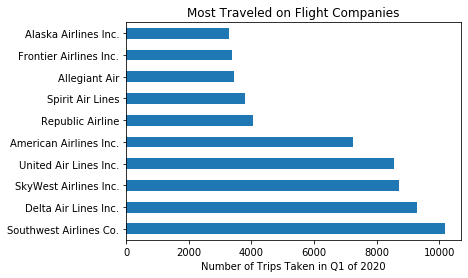

In [26]:
flights.UNIQUE_CARRIER_NAME.value_counts().head(10).plot(kind='barh', title = 'Most Traveled on Flight Companies')
plt.xlabel('Number of Trips Taken in Q1 of 2020');

## Variation of Passenger/Seat Ratio in Top 5 US Airlines

The passenger/seat ratio range differ from airline to airline. Southwest Airlines has a wide range when talking about that ratio, ranging from 20%-80% of the flights being full. while the United Airlines range form about 50%-85%(which might indicate that the United Airlines is more succesfull in making sure that they sell a higher rate of seats compared to Southwest Airlines).

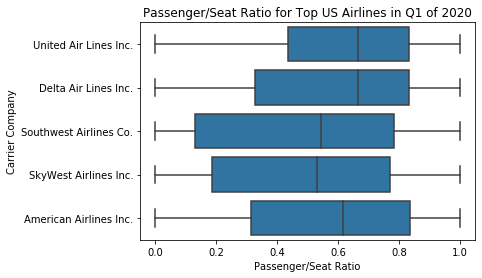

In [13]:
base_color = sb.color_palette()[0]
sb.boxplot(data = flights, x = 'Passenger_Seat_Ratio', y = top_carriers, color = base_color)
plt.title('Passenger/Seat Ratio for Top US Airlines in Q1 of 2020')
plt.xlabel('Passenger/Seat Ratio')
plt.ylabel('Carrier Company');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert flights_slide_deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [28]:
!jupyter nbconvert flights_slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook flights_slide_deck.ipynb to slides
[NbConvertApp] Writing 359592 bytes to flights_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Yasir\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Yasir\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Yasir\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Yasir\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Yasir\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'flights_slide_deck.ipynb'])

0